In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes


In [39]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [40]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [41]:
df_new = pd.get_dummies(df, columns=['ChestPain', 'Thal'], drop_first=True)

In [42]:
x = df_new.drop('AHD', axis=1)
y = df_new['AHD']

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(x_train, y_train)

SVC()

In [47]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6721311475409836
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        29
           1       0.83      0.47      0.60        32

    accuracy                           0.67        61
   macro avg       0.72      0.68      0.66        61
weighted avg       0.72      0.67      0.66        61



In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Text(0.5, 1.0, 'Age vs Cholesterol')

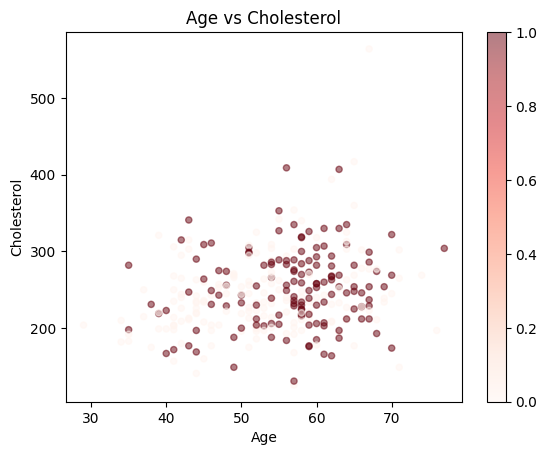

In [49]:
data.plot(kind='scatter', x='Age', y='Chol', alpha=0.5, c=y, cmap = 'Reds')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
#plt.show()